In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## EDA

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df.shape

(7043, 21)

In [5]:
for col in df.iloc[:, :10].columns:
    print(f"{col} --> {df[col].unique().tolist()}\n")

customerID --> ['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', '7795-CFOCW', '9237-HQITU', '9305-CDSKC', '1452-KIOVK', '6713-OKOMC', '7892-POOKP', '6388-TABGU', '9763-GRSKD', '7469-LKBCI', '8091-TTVAX', '0280-XJGEX', '5129-JLPIS', '3655-SNQYZ', '8191-XWSZG', '9959-WOFKT', '4190-MFLUW', '4183-MYFRB', '8779-QRDMV', '1680-VDCWW', '1066-JKSGK', '3638-WEABW', '6322-HRPFA', '6865-JZNKO', '6467-CHFZW', '8665-UTDHZ', '5248-YGIJN', '8773-HHUOZ', '3841-NFECX', '4929-XIHVW', '6827-IEAUQ', '7310-EGVHZ', '3413-BMNZE', '6234-RAAPL', '6047-YHPVI', '6572-ADKRS', '5380-WJKOV', '8168-UQWWF', '8865-TNMNX', '9489-DEDVP', '9867-JCZSP', '4671-VJLCL', '4080-IIARD', '3714-NTNFO', '5948-UJZLF', '7760-OYPDY', '7639-LIAYI', '2954-PIBKO', '8012-SOUDQ', '9420-LOJKX', '6575-SUVOI', '7495-OOKFY', '4667-QONEA', '1658-BYGOY', '8769-KKTPH', '5067-XJQFU', '3957-SQXML', '5954-BDFSG', '0434-CSFON', '1215-FIGMP', '0526-SXDJP', '0557-ASKVU', '5698-BQJOH', '5122-CYFXA', '8627-ZYGSZ', '3410-YOQBQ', '3170-NMYVV', '7410-OIEDU', '227

In [6]:
for col in df.iloc[:, 10:].columns:
    print(f"{col} --> {df[col].unique().tolist()}\n")

OnlineBackup --> ['Yes', 'No', 'No internet service']

DeviceProtection --> ['No', 'Yes', 'No internet service']

TechSupport --> ['No', 'Yes', 'No internet service']

StreamingTV --> ['No', 'Yes', 'No internet service']

StreamingMovies --> ['No', 'Yes', 'No internet service']

Contract --> ['Month-to-month', 'One year', 'Two year']

PaperlessBilling --> ['Yes', 'No']

PaymentMethod --> ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']

MonthlyCharges --> [29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1, 29.75, 104.8, 56.15, 49.95, 18.95, 100.35, 103.7, 105.5, 113.25, 20.65, 106.7, 55.2, 90.05, 39.65, 19.8, 20.15, 59.9, 59.6, 55.3, 99.35, 30.2, 90.25, 64.7, 96.35, 95.5, 66.15, 20.2, 45.25, 99.9, 69.7, 74.8, 106.35, 97.85, 49.55, 69.2, 20.75, 79.85, 76.2, 84.5, 49.25, 80.65, 79.75, 64.15, 99.1, 69.5, 74.85, 95.45, 108.45, 24.95, 107.5, 100.5, 89.9, 42.1, 54.4, 94.4, 75.3, 78.9, 79.2, 49.05, 20.4, 111.6, 24.25, 64.5, 110.5, 55.65, 54.65, 74.75, 25

## Feature Engineering

Convert 'TotalCharges' data type to float

In [7]:
df[df['TotalCharges'] == ' '].reset_index(drop=True)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
1,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
2,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
3,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
4,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
5,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
6,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
7,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
8,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
9,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0').astype(float)

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df[df['tenure'] == 36].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
116,9560-BBZXK,Female,0,No,No,36,No,No phone service,DSL,Yes,No,No,No,No,No,Two year,No,Bank transfer (automatic),31.05,1126.35,No
338,7982-VCELR,Female,0,No,No,36,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),94.80,3565.65,No
436,4980-URKXC,Male,0,Yes,No,36,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.85,720.05,No
444,1910-FMXJM,Female,0,Yes,No,36,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Electronic check,80.40,2937.65,No
838,6092-QZVPP,Male,0,No,No,36,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),79.20,2854.95,No


Categorize 'tenure' per year

In [11]:
# # Categorize 'tenure'
# tenure_bins = [-1, 12, 24, 36, 48, 60, 72]
# tenure_labels = ['1st Year', '2nd Year', '3rd Year', '4th Year', '5th Year', '6th Year']
# df['tenure'] = pd.cut(df['tenure'], bins=tenure_bins, labels=tenure_labels, right=True)

# df['tenure'] = df['tenure'].astype('object')

In [12]:
# df['tenure'].unique()

### Data Distribution

In [13]:
def dist_col_plot(rows, cols, data):
    fig, axes = plt.subplots(rows, cols, figsize=(30, 10))

    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < len(data.columns):
            sns.histplot(data=data, x=data.columns[i], ax=ax)
            ax.set_title(data.columns[i])
        else:
            ax.set_visible(False)

    plt.tight_layout()
    plt.show()

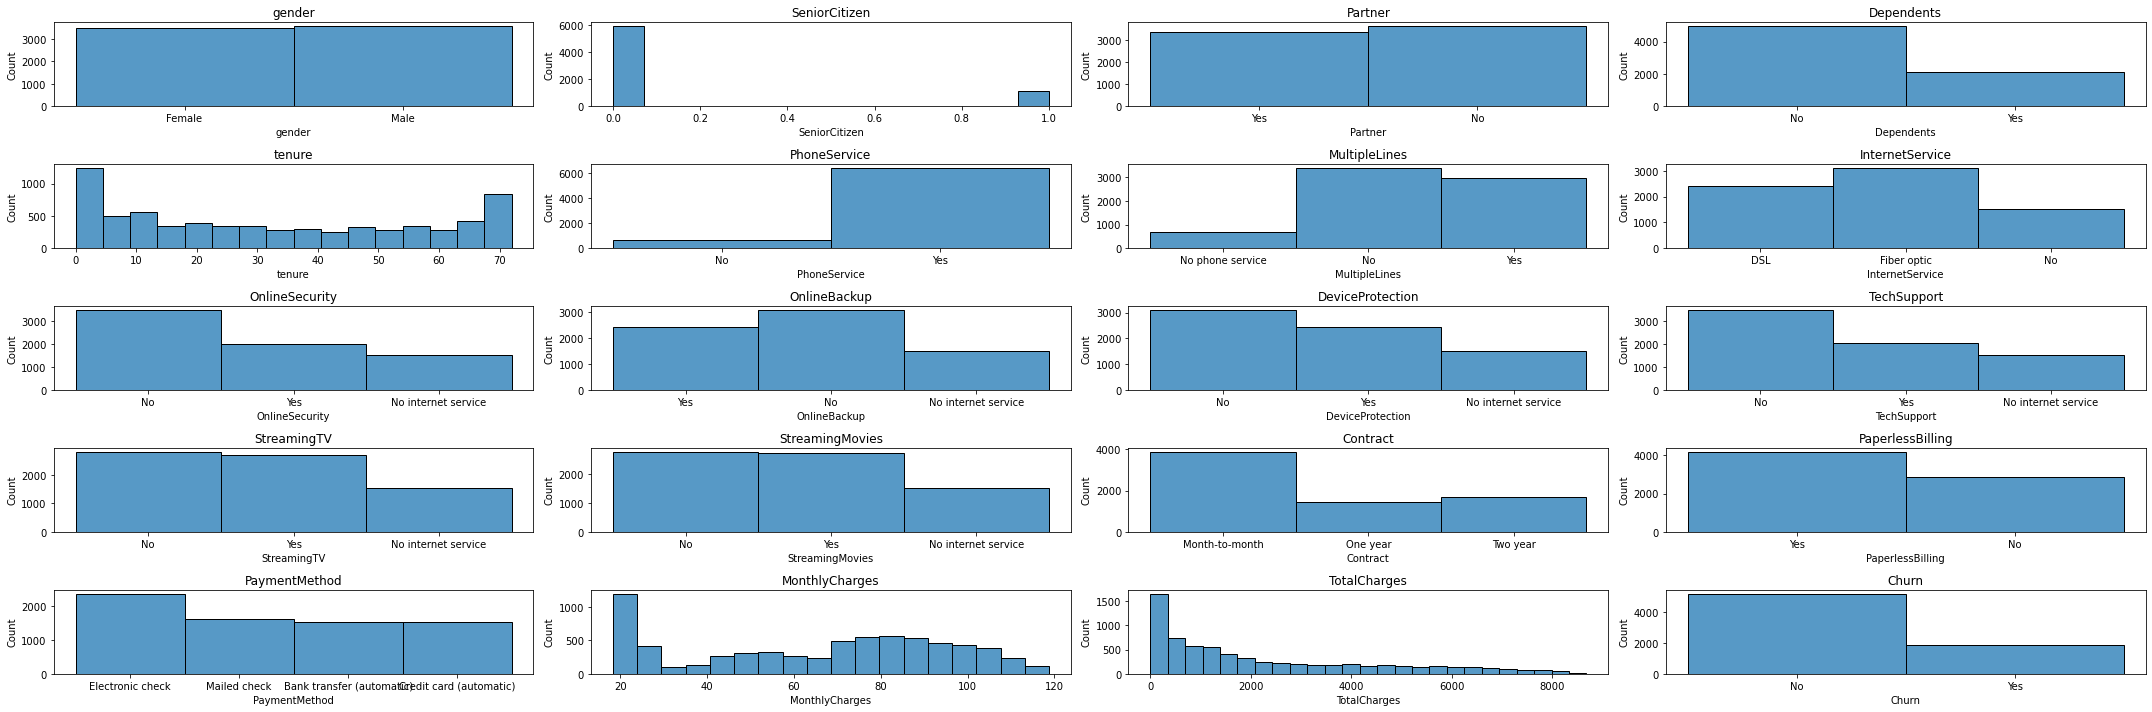

In [14]:
dist_col_plot(rows=5, cols=4, data=df.iloc[:, 1:])

### Checking Outliers

In [15]:
def plot_box(data, labels, title, figsize=(10, 5)):
    sns.set_style("whitegrid")
    plt.figure(figsize=figsize)
    ax = sns.boxplot(data=data, orient='h', showmeans=True)
    ax.set_xlabel('Value', fontsize=14)  # Menambahkan fontsize di sini
    ax.set_title(title, fontsize=14)
    ax.set_yticklabels(labels, fontsize=14)
    ax.tick_params(axis='x', labelsize=14)  # Memperbesar ukuran font pada sumbu x
    plt.show()

In [16]:
df.select_dtypes(exclude='object')

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


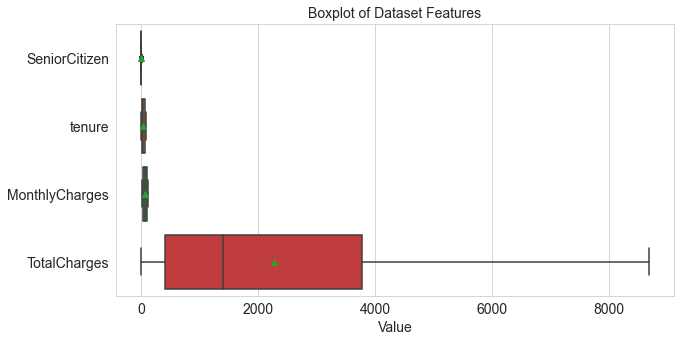

In [18]:
data=df.select_dtypes(exclude='object')

plot_box(data = data,
         labels = data.columns.tolist(),
         title='Boxplot of Dataset Features')

### Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

def print_mapping_classes(col):
    print(f"Column '{col}':")
    df[col] = le.fit_transform(df[col])
    
    for i in range(len(df[col].unique())):
        print(f"   --> {le.classes_[i]} : {i}")

In [20]:
df.iloc[:, 1:].select_dtypes(include='object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [21]:
for i in df.iloc[:, 1:].select_dtypes(include='object').columns:
    print_mapping_classes(i)

Column 'gender':
   --> Female : 0
   --> Male : 1
Column 'Partner':
   --> No : 0
   --> Yes : 1
Column 'Dependents':
   --> No : 0
   --> Yes : 1
Column 'PhoneService':
   --> No : 0
   --> Yes : 1
Column 'MultipleLines':
   --> No : 0
   --> No phone service : 1
   --> Yes : 2
Column 'InternetService':
   --> DSL : 0
   --> Fiber optic : 1
   --> No : 2
Column 'OnlineSecurity':
   --> No : 0
   --> No internet service : 1
   --> Yes : 2
Column 'OnlineBackup':
   --> No : 0
   --> No internet service : 1
   --> Yes : 2
Column 'DeviceProtection':
   --> No : 0
   --> No internet service : 1
   --> Yes : 2
Column 'TechSupport':
   --> No : 0
   --> No internet service : 1
   --> Yes : 2
Column 'StreamingTV':
   --> No : 0
   --> No internet service : 1
   --> Yes : 2
Column 'StreamingMovies':
   --> No : 0
   --> No internet service : 1
   --> Yes : 2
Column 'Contract':
   --> Month-to-month : 0
   --> One year : 1
   --> Two year : 2
Column 'PaperlessBilling':
   --> No : 0
   --> Yes

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


In [23]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Correlation Matrix

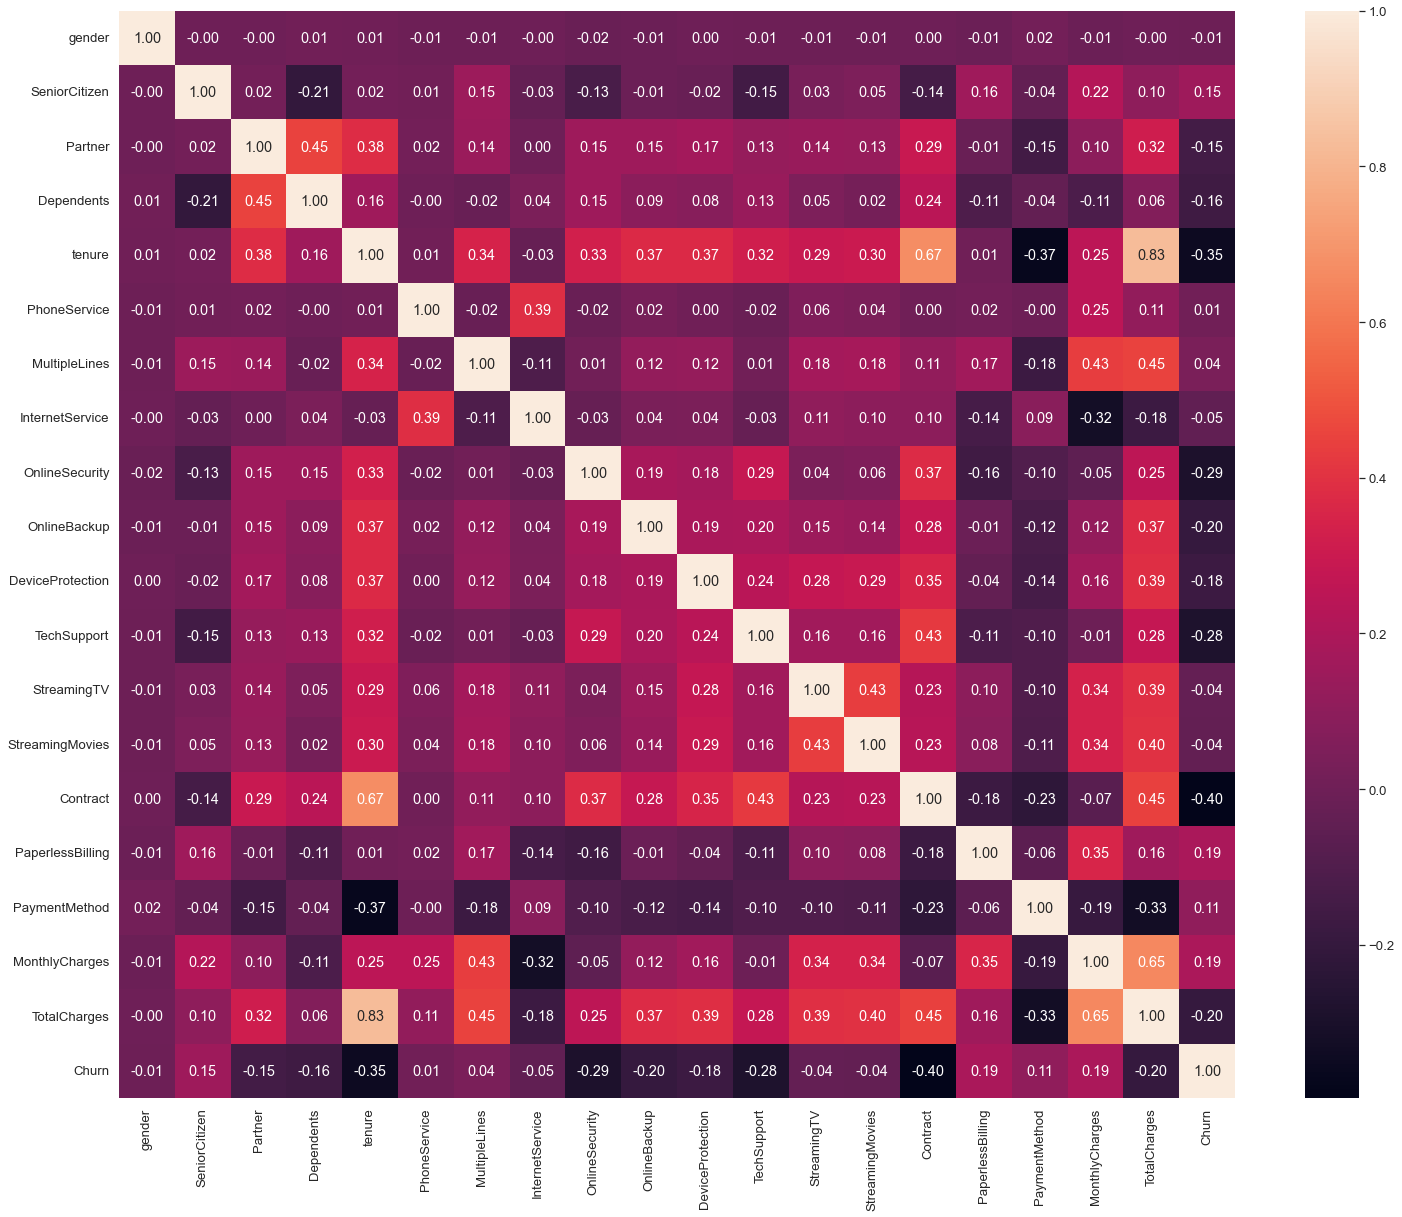

In [24]:
corr = df.corr()

plt.figure(figsize=(25,20))
sns.set(font_scale=1.2)
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

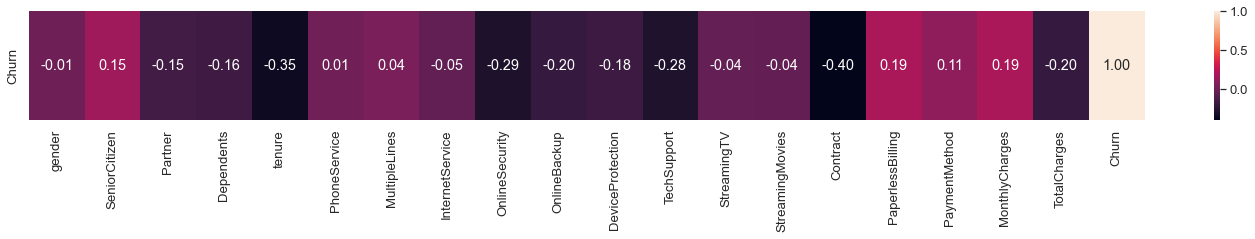

In [25]:
plt.figure(figsize=(25,2))
sns.set(font_scale=1.2)
sns.heatmap(corr.loc[['Churn'], :], annot=True, fmt='.2f')
plt.show()

### Scaling 'MonthlyCharges' & 'TotalCharges'

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols = df[['MonthlyCharges', 'TotalCharges', 'tenure']].columns
df[cols] = scaler.fit_transform(df[cols])

In [27]:
df_id = df[['customerID']]
df.drop('customerID', axis=1, inplace=True)

In [28]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.003437,0
1,1,0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.217564,0
2,1,0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.012453,1
3,1,0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.211951,0
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.017462,1


### Checking Multicolinearity

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant

X = df

# Tambahkan sebuah konstanta pada dataframe (prasyarat perhitungan)
X = add_constant(X)

# VIF dataframe
vif_data = pd.DataFrame()

# Hitung VIF tiap fitur
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data = vif_data[vif_data['feature'] != 'const']

display(vif_data)

,feature,VIF
1,gender,1.001950
2,SeniorCitizen,1.152187
3,Partner,1.460978
4,Dependents,1.383449
5,tenure,7.445249
6,PhoneService,1.633822
7,MultipleLines,1.395332
8,InternetService,1.836929
9,OnlineSecurity,1.277954
10,OnlineBackup,1.221185


## Classification Modelling

### Splitting Data

In [30]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, balanced_accuracy_score
import numpy as np

X = df.iloc[:, :-1]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

# KFold Cross Validation
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

### ANN

In [129]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize lists to store evaluation metrics
accuracy_scores = []
f1_scores = []
roc_auc_scores = []
balanced_accuracy_scores = []

# Define ANN model
ann = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32)

y_prob_fold = ann.predict(X_val_fold)
y_pred_fold = (y_prob_fold > 0.5).astype(int)

accuracy_scores.append(accuracy_score(y_val_fold, y_pred_fold))
f1_scores.append(f1_score(y_val_fold, y_pred_fold))
roc_auc_scores.append(roc_auc_score(y_val_fold, y_pred_fold))
balanced_accuracy_scores.append(balanced_accuracy_score(y_val_fold, y_pred_fold))

Epoch 1/10
159/159 [==============================] - 2s 4ms/step - loss: 0.4784 - accuracy: 0.7679
Epoch 2/10
159/159 [==============================] - 1s 4ms/step - loss: 0.4439 - accuracy: 0.7851
Epoch 3/10
159/159 [==============================] - 1s 4ms/step - loss: 0.4380 - accuracy: 0.7866
Epoch 4/10
159/159 [==============================] - 1s 5ms/step - loss: 0.4317 - accuracy: 0.7937
Epoch 5/10
159/159 [==============================] - 1s 4ms/step - loss: 0.4270 - accuracy: 0.7939
Epoch 6/10
159/159 [==============================] - 1s 4ms/step - loss: 0.4231 - accuracy: 0.8024
Epoch 7/10
159/159 [==============================] - 1s 3ms/step - loss: 0.4223 - accuracy: 0.8016
Epoch 8/10
159/159 [==============================] - 1s 4ms/step - loss: 0.4173 - accuracy: 0.8034
Epoch 9/10
159/159 [==============================] - 0s 3ms/step - loss: 0.4155 - accuracy: 0.8030
Epoch 10/10
18/18 [==============================] - 0s 2ms/step


In [130]:
# Calculate average metrics on validation data
avg_accuracy_ann_val = round(np.mean(accuracy_scores), 3)
avg_f1_ann_val = round(np.mean(f1_scores), 3)
avg_roc_auc_ann_val = round(np.mean(roc_auc_scores), 3)
avg_balanced_accuracy_ann_val = round(np.mean(balanced_accuracy_scores), 3)

y_prob_test = ann.predict(X_test)
y_pred_test = (y_prob_test > 0.5).astype(int)

# Calculate metrics on test data
accuracy_ann_test = round(accuracy_score(y_test, y_pred_test), 3)
f1_ann_test = round(f1_score(y_test, y_pred_test), 3)
roc_auc_ann_test = round(roc_auc_score(y_test, y_pred_test), 3)
balanced_accuracy_ann_test = round(balanced_accuracy_score(y_test, y_pred_test), 3)

print("Evaluation Metrics:")
print(f"(Accuracy)          --> Avg. Validation: {avg_accuracy_ann_val}\t| Test: {accuracy_ann_test}")
print(f"(F1 Score)          --> Avg. Validation: {avg_f1_ann_val}\t| Test: {f1_ann_test}")
print(f"(ROC-AUC Score)     --> Avg. Validation: {avg_roc_auc_ann_val}\t| Test: {roc_auc_ann_test}")
print(f"(Balanced Accuracy) --> Avg. Validation: {avg_balanced_accuracy_ann_val}\t| Test: {balanced_accuracy_ann_test}")

45/45 [==============================] - 0s 4ms/step
Evaluation Metrics:
(Accuracy)          --> Avg. Validation: 0.812	| Test: 0.808
(F1 Score)          --> Avg. Validation: 0.602	| Test: 0.621
(ROC-AUC Score)     --> Avg. Validation: 0.732	| Test: 0.739
(Balanced Accuracy) --> Avg. Validation: 0.732	| Test: 0.739


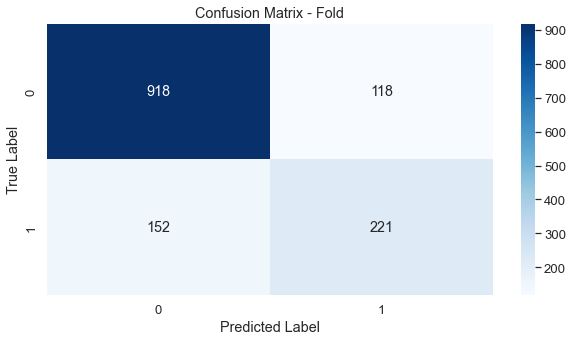

In [131]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Fold')
plt.show()

In [132]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1036
           1       0.65      0.59      0.62       373

    accuracy                           0.81      1409
   macro avg       0.75      0.74      0.75      1409
weighted avg       0.80      0.81      0.81      1409



45/45 [==============================] - 0s 3ms/step


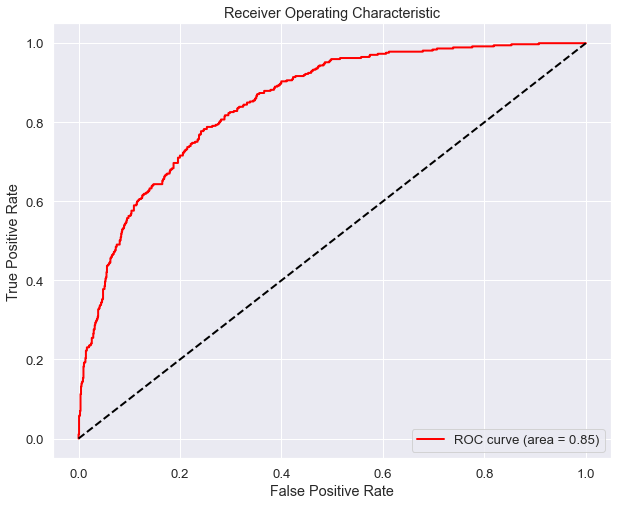

In [133]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_prob_test = ann.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_prob_test)
roc_auc_ann = auc(fpr_ann, tpr_ann)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_ann, tpr_ann, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_ann)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

accuracy_scores = []
f1_scores = []
roc_auc_scores = []
balanced_accuracy_scores = []

rfc.fit(X_train_fold, y_train_fold)

y_pred_fold = rfc.predict(X_val_fold)

accuracy_scores.append(accuracy_score(y_val_fold, y_pred_fold))
f1_scores.append(f1_score(y_val_fold, y_pred_fold))
roc_auc_scores.append(roc_auc_score(y_val_fold, y_pred_fold))
balanced_accuracy_scores.append(balanced_accuracy_score(y_val_fold, y_pred_fold))


In [37]:
# Mean metrics pada data validasi
avg_accuracy_rfc_val = round(np.mean(accuracy_scores), 3)
avg_f1_rfc_val = round(np.mean(f1_scores), 3)
avg_roc_auc_rfc_val = round(np.mean(roc_auc_scores), 3)
avg_balanced_accuracy_rfc_val = round(np.mean(balanced_accuracy_scores), 3)

rfc.fit(X_train, y_train)
y_pred_test = rfc.predict(X_test)

# Metrics pada data test
accuracy_rfc_test = round(accuracy_score(y_test, y_pred_test), 3)
f1_rfc_test = round(f1_score(y_test, y_pred_test), 3)
roc_auc_rfc_test = round(roc_auc_score(y_test, y_pred_test), 3)
balanced_accuracy_rfc_test = round(balanced_accuracy_score(y_test, y_pred_test), 3)

print("Evaluation Metrics:")
print(f"(Accuracy)          --> Avg. Validation: {avg_accuracy_rfc_val}\t| Test: {accuracy_rfc_test}")
print(f"(F1 Score)          --> Avg. Validation: {avg_f1_rfc_val}\t| Test: {f1_rfc_test}")
print(f"(ROC-AUC Score)     --> Avg. Validation: {avg_roc_auc_rfc_val}\t| Test: {roc_auc_rfc_test}")
print(f"(Balanced Accuracy) --> Avg. Validation: {avg_balanced_accuracy_rfc_val}\t| Test: {balanced_accuracy_rfc_test}")

Evaluation Metrics:
(Accuracy)          --> Avg. Validation: 0.812	| Test: 0.791
(F1 Score)          --> Avg. Validation: 0.566	| Test: 0.541
(ROC-AUC Score)     --> Avg. Validation: 0.706	| Test: 0.687
(Balanced Accuracy) --> Avg. Validation: 0.706	| Test: 0.687


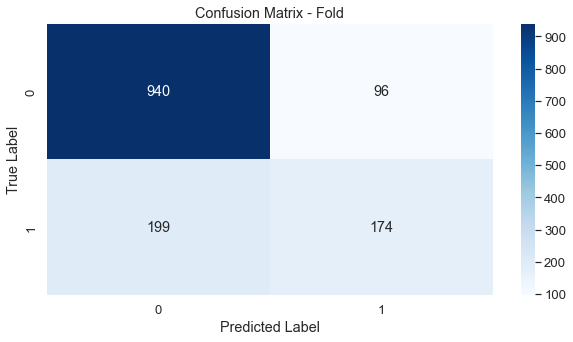

In [38]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Fold')
plt.show()

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1036
           1       0.64      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



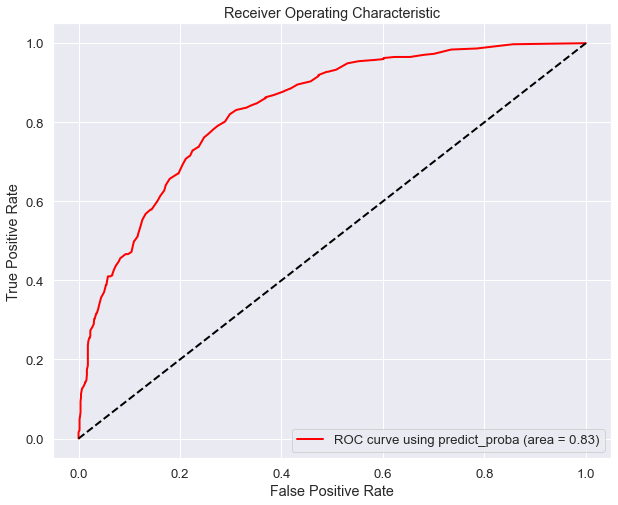

In [40]:
from sklearn.metrics import roc_curve, auc

# Menghitung TPR dan FPR untuk kedua metode
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, rfc.predict_proba(X_test)[:, 1])
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

# Memplot kurva ROC-AUC
plt.figure(figsize=(10, 8))  # Mengatur ukuran gambar menjadi 10x8
plt.plot(fpr_rfc, tpr_rfc, color='red', lw=2, label='ROC curve using predict_proba (area = %0.2f)' % roc_auc_rfc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression Classifier

In [41]:
from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression()
kf = KFold(n_splits=10, shuffle=True, random_state=42)

accuracy_scores = []
f1_scores = []
roc_auc_scores = []
balanced_accuracy_scores = []

lrc.fit(X_train_fold, y_train_fold)

y_pred_fold = lrc.predict(X_val_fold)

accuracy_scores.append(accuracy_score(y_val_fold, y_pred_fold))
f1_scores.append(f1_score(y_val_fold, y_pred_fold))
roc_auc_scores.append(roc_auc_score(y_val_fold, y_pred_fold))
balanced_accuracy_scores.append(balanced_accuracy_score(y_val_fold, y_pred_fold))


In [42]:
# Mean metrics pada data validasi
avg_accuracy_lrc_val = round(np.mean(accuracy_scores), 3)
avg_f1_lrc_val = round(np.mean(f1_scores), 3)
avg_roc_auc_lrc_val = round(np.mean(roc_auc_scores), 3)
avg_balanced_accuracy_lrc_val = round(np.mean(balanced_accuracy_scores), 3)

lrc.fit(X_train, y_train)
y_pred_test = lrc.predict(X_test)

# Metrics pada data test
accuracy_lrc_test = round(accuracy_score(y_test, y_pred_test), 3)
f1_lrc_test = round(f1_score(y_test, y_pred_test), 3)
roc_auc_lrc_test = round(roc_auc_score(y_test, y_pred_test), 3)
balanced_accuracy_lrc_test = round(balanced_accuracy_score(y_test, y_pred_test), 3)

print("Evaluation Metrics:")
print(f"(Accuracy)          --> Avg. Validation: {avg_accuracy_lrc_val}\t| Test: {accuracy_lrc_test}")
print(f"(F1 Score)          --> Avg. Validation: {avg_f1_lrc_val}\t| Test: {f1_lrc_test}")
print(f"(ROC-AUC Score)     --> Avg. Validation: {avg_roc_auc_lrc_val}\t| Test: {roc_auc_lrc_test}")
print(f"(Balanced Accuracy) --> Avg. Validation: {avg_balanced_accuracy_lrc_val}\t| Test: {balanced_accuracy_lrc_test}")

Evaluation Metrics:
(Accuracy)          --> Avg. Validation: 0.817	| Test: 0.816
(F1 Score)          --> Avg. Validation: 0.62	| Test: 0.625
(ROC-AUC Score)     --> Avg. Validation: 0.746	| Test: 0.74
(Balanced Accuracy) --> Avg. Validation: 0.746	| Test: 0.74


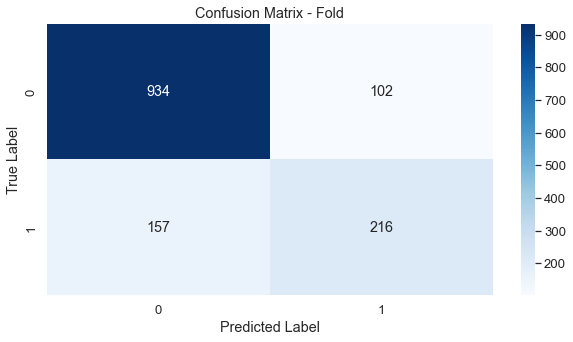

In [43]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Fold')
plt.show()

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



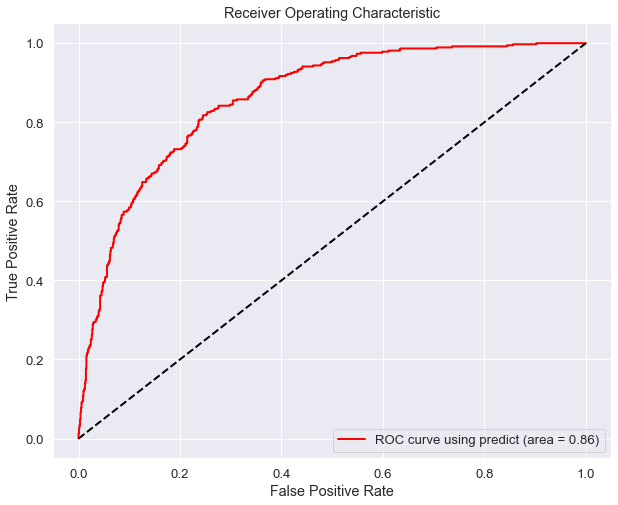

In [45]:
from sklearn.metrics import roc_curve, auc

# Menghitung TPR dan FPR untuk kedua metode
fpr_lrc, tpr_lrc, _ = roc_curve(y_test, lrc.predict_proba(X_test)[:, 1])
roc_auc_lrc = auc(fpr_lrc, tpr_lrc)

# fpr_pred, tpr_pred, _ = roc_curve(y_test, y_pred_test)
# roc_auc_pred = auc(fpr_pred, tpr_pred)

# Memplot kurva ROC-AUC
plt.figure(figsize=(10, 8))  # Mengatur ukuran gambar menjadi 10x8
plt.plot(fpr_lrc, tpr_lrc, color='red', lw=2, label='ROC curve using predict (area = %0.2f)' % roc_auc_lrc)
# plt.plot(fpr_pred, tpr_pred, color='green', lw=2, label='ROC curve using y_pred (area = %0.2f)' % roc_auc_pred)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### KNN Classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

accuracy_scores = []
f1_scores = []
roc_auc_scores = []
balanced_accuracy_scores = []

knn.fit(X_train_fold, y_train_fold)

y_pred_fold = knn.predict(X_val_fold)

accuracy_scores.append(accuracy_score(y_val_fold, y_pred_fold))
f1_scores.append(f1_score(y_val_fold, y_pred_fold))
roc_auc_scores.append(roc_auc_score(y_val_fold, y_pred_fold))
balanced_accuracy_scores.append(balanced_accuracy_score(y_val_fold, y_pred_fold))


In [47]:
# Mean metrics pada data validasi
avg_accuracy_knn_val = round(np.mean(accuracy_scores),3)
avg_f1_knn_val = round(np.mean(f1_scores), 3)
avg_roc_auc_knn_val = round(np.mean(roc_auc_scores), 3)
avg_balanced_accuracy_knn_val = round(np.mean(balanced_accuracy_scores),3 )

knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test)

# Metrics pada data test
accuracy_knn_test = accuracy_score(y_test, y_pred_test)
f1_knn_test = f1_score(y_test, y_pred_test)
roc_auc_knn_test = roc_auc_score(y_test, y_pred_test)
balanced_accuracy_knn_test = balanced_accuracy_score(y_test, y_pred_test)

print("Evaluation Metrics:")
print(f"(Accuracy)          --> Avg. Validation: {avg_accuracy_knn_val}\t| Test: {accuracy_knn_test}")
print(f"(F1 Score)          --> Avg. Validation: {avg_f1_knn_val}\t| Test: {f1_knn_test}")
print(f"(ROC-AUC Score)     --> Avg. Validation: {avg_roc_auc_knn_val}\t| Test: {roc_auc_knn_test}")
print(f"(Balanced Accuracy) --> Avg. Validation: {avg_balanced_accuracy_knn_val}\t| Test: {balanced_accuracy_knn_test}")

Evaluation Metrics:
(Accuracy)          --> Avg. Validation: 0.746	| Test: 0.7558552164655784
(F1 Score)          --> Avg. Validation: 0.468	| Test: 0.5141242937853107
(ROC-AUC Score)     --> Avg. Validation: 0.648	| Test: 0.6701261295765317
(Balanced Accuracy) --> Avg. Validation: 0.648	| Test: 0.6701261295765317


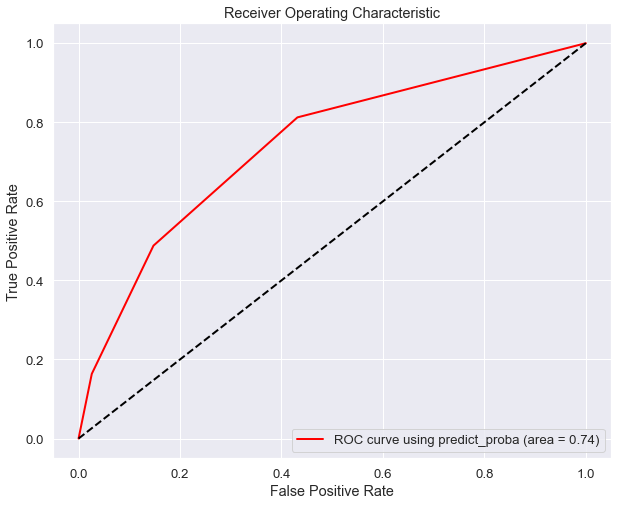

In [48]:
from sklearn.metrics import roc_curve, auc

# Menghitung TPR dan FPR untuk kedua metode
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

# fpr_pred, tpr_pred, _ = roc_curve(y_test, y_pred_test)
# roc_auc_pred = auc(fpr_pred, tpr_pred)

# Memplot kurva ROC-AUC
plt.figure(figsize=(10, 8))  # Mengatur ukuran gambar menjadi 10x8
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label='ROC curve using predict_proba (area = %0.2f)' % roc_auc_knn)
# plt.plot(fpr_pred, tpr_pred, color='green', lw=2, label='ROC curve using y_pred (area = %0.2f)' % roc_auc_pred)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

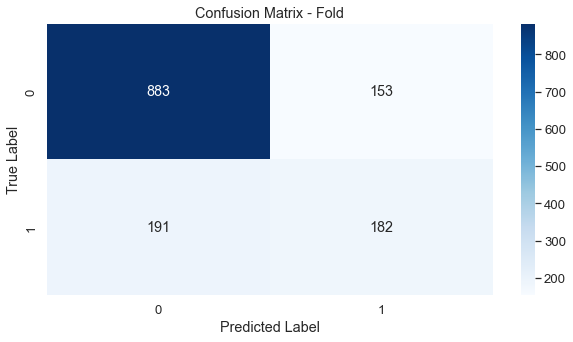

In [49]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Fold')
plt.show()

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1036
           1       0.54      0.49      0.51       373

    accuracy                           0.76      1409
   macro avg       0.68      0.67      0.68      1409
weighted avg       0.75      0.76      0.75      1409



### Catboost

In [51]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(iterations=100, random_state=42, verbose=False)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

accuracy_scores = []
f1_scores = []
roc_auc_scores = []
balanced_accuracy_scores = []

cbc.fit(X_train_fold, y_train_fold)

y_pred_fold = cbc.predict(X_val_fold)

accuracy_scores.append(accuracy_score(y_val_fold, y_pred_fold))
f1_scores.append(f1_score(y_val_fold, y_pred_fold))
roc_auc_scores.append(roc_auc_score(y_val_fold, y_pred_fold))
balanced_accuracy_scores.append(balanced_accuracy_score(y_val_fold, y_pred_fold))


In [52]:
# Mean metrics pada data validasi
avg_accuracy_cbc_val = round(np.mean(accuracy_scores), 3)
avg_f1_cbc_val = round(np.mean(f1_scores), 3)
avg_roc_auc_cbc_val = round(np.mean(roc_auc_scores), 3)
avg_balanced_accuracy_cbc_val = round(np.mean(balanced_accuracy_scores), 3)

cbc.fit(X_train, y_train)
y_pred_test = cbc.predict(X_test)

# Metrics pada data test
accuracy_cbc_test = accuracy_score(y_test, y_pred_test)
f1_cbc_test = f1_score(y_test, y_pred_test)
roc_auc_cbc_test = roc_auc_score(y_test, y_pred_test)
balanced_accuracy_cbc_test = balanced_accuracy_score(y_test, y_pred_test)

print("Evaluation Metrics:")
print(f"(Accuracy)          --> Avg. Validation: {avg_accuracy_cbc_val}\t| Test: {accuracy_cbc_test}")
print(f"(F1 Score)          --> Avg. Validation: {avg_f1_cbc_val}\t| Test: {f1_cbc_test}")
print(f"(ROC-AUC Score)     --> Avg. Validation: {avg_roc_auc_cbc_val}\t| Test: {roc_auc_cbc_test}")
print(f"(Balanced Accuracy) --> Avg. Validation: {avg_balanced_accuracy_cbc_val}\t| Test: {balanced_accuracy_cbc_test}")

Evaluation Metrics:
(Accuracy)          --> Avg. Validation: 0.826	| Test: 0.8112136266855926
(F1 Score)          --> Avg. Validation: 0.617	| Test: 0.6017964071856288
(ROC-AUC Score)     --> Avg. Validation: 0.739	| Test: 0.7240702019522396
(Balanced Accuracy) --> Avg. Validation: 0.739	| Test: 0.7240702019522395


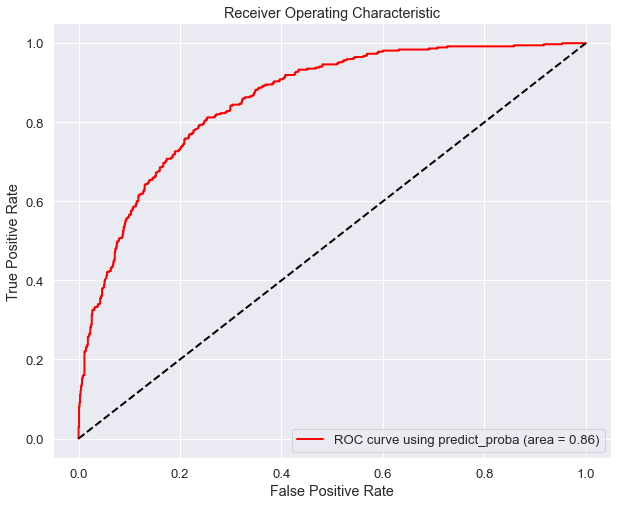

In [53]:
from sklearn.metrics import roc_curve, auc

# Menghitung TPR dan FPR untuk kedua metode
fpr_cbc, tpr_cbc, _ = roc_curve(y_test, cbc.predict_proba(X_test)[:, 1])
roc_auc_cbc = auc(fpr_cbc, tpr_cbc)

# fpr_pred, tpr_pred, _ = roc_curve(y_test, y_pred_test)
# roc_auc_pred = auc(fpr_pred, tpr_pred)

# Memplot kurva ROC-AUC
plt.figure(figsize=(10, 8))  # Mengatur ukuran gambar menjadi 10x8
plt.plot(fpr_cbc, tpr_cbc, color='red', lw=2, label='ROC curve using predict_proba (area = %0.2f)' % roc_auc_cbc)
# plt.plot(fpr_pred, tpr_pred, color='green', lw=2, label='ROC curve using y_pred (area = %0.2f)' % roc_auc_pred)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

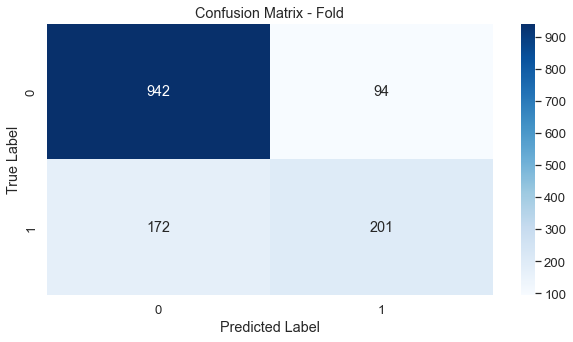

In [54]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Fold')
plt.show()

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



### Light GBM

In [56]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=100, random_state=42, verbose=0)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

accuracy_scores = []
f1_scores = []
roc_auc_scores = []
balanced_accuracy_scores = []

lgbm.fit(X_train_fold, y_train_fold)

y_pred_fold = lgbm.predict(X_val_fold)

accuracy_scores.append(accuracy_score(y_val_fold, y_pred_fold))
f1_scores.append(f1_score(y_val_fold, y_pred_fold))
roc_auc_scores.append(roc_auc_score(y_val_fold, y_pred_fold))
balanced_accuracy_scores.append(balanced_accuracy_score(y_val_fold, y_pred_fold))


In [57]:
# Mean metrics pada data validasi
avg_accuracy_lgbm_val = round(np.mean(accuracy_scores), 3)
avg_f1_lgbm_val = round(np.mean(f1_scores), 3)
avg_roc_auc_lgbm_val = round(np.mean(roc_auc_scores), 3)
avg_balanced_accuracy_lgbm_val = round(np.mean(balanced_accuracy_scores), 3)

lgbm.fit(X_train, y_train)
y_pred_test = lgbm.predict(X_test)

# Metrics pada data test
accuracy_lgbm_test = accuracy_score(y_test, y_pred_test)
f1_lgbm_test = f1_score(y_test, y_pred_test)
roc_auc_lgbm_test = roc_auc_score(y_test, y_pred_test)
balanced_accuracy_lgbm_test = balanced_accuracy_score(y_test, y_pred_test)

print("Evaluation Metrics:")
print(f"(Accuracy)          --> Avg. Validation: {avg_accuracy_lgbm_val}\t| Test: {accuracy_lgbm_test}")
print(f"(F1 Score)          --> Avg. Validation: {avg_f1_lgbm_val}\t| Test: {f1_lgbm_test}")
print(f"(ROC-AUC Score)     --> Avg. Validation: {avg_roc_auc_lgbm_val}\t| Test: {roc_auc_lgbm_test}")
print(f"(Balanced Accuracy) --> Avg. Validation: {avg_balanced_accuracy_lgbm_val}\t| Test: {balanced_accuracy_lgbm_test}")

Evaluation Metrics:
(Accuracy)          --> Avg. Validation: 0.817	| Test: 0.7998580553584103
(F1 Score)          --> Avg. Validation: 0.602	| Test: 0.5852941176470589
(ROC-AUC Score)     --> Avg. Validation: 0.731	| Test: 0.7146324800480297
(Balanced Accuracy) --> Avg. Validation: 0.731	| Test: 0.7146324800480297


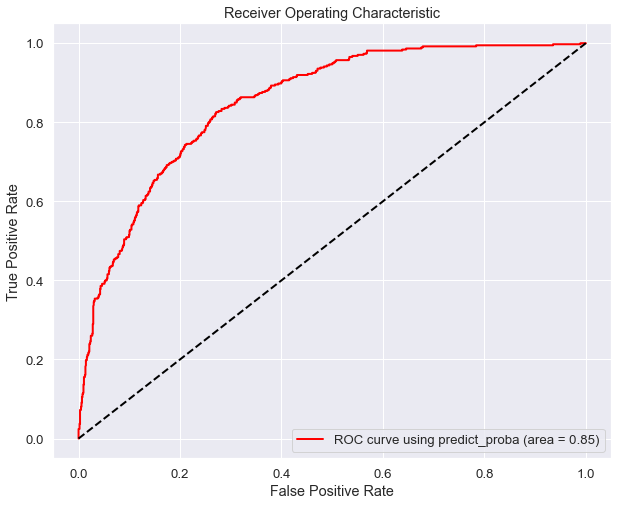

In [58]:
from sklearn.metrics import roc_curve, auc

# Menghitung TPR dan FPR untuk kedua metode
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, lgbm.predict_proba(X_test)[:, 1])
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

# fpr_pred, tpr_pred, _ = roc_curve(y_test, y_pred_test)
# roc_auc_pred = auc(fpr_pred, tpr_pred)

# Memplot kurva ROC-AUC
plt.figure(figsize=(10, 8))  # Mengatur ukuran gambar menjadi 10x8
plt.plot(fpr_lgbm, tpr_lgbm, color='red', lw=2, label='ROC curve using predict_proba (area = %0.2f)' % roc_auc_lgbm)
# plt.plot(fpr_pred, tpr_pred, color='green', lw=2, label='ROC curve using y_pred (area = %0.2f)' % roc_auc_pred)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

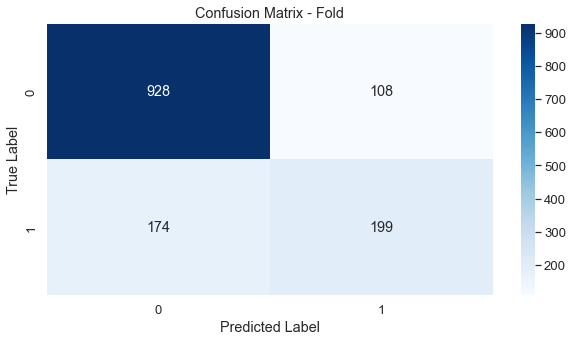

In [59]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Fold')
plt.show()

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.65      0.53      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



## Evaluation

In [61]:
df_metric = pd.DataFrame({
    'Model Name':['Random Forest', 'Logistic Regression', 'KNN', 'Catboost', 'Light GBM', 'ANN'],
    '(Val.) Balanced Accuracy':[avg_balanced_accuracy_rfc_val, avg_balanced_accuracy_lrc_val, avg_balanced_accuracy_knn_val, avg_balanced_accuracy_cbc_val, avg_balanced_accuracy_lgbm_val, avg_balanced_accuracy_ann_val],
    '(Test) Balanced Accuracy':[balanced_accuracy_rfc_test, balanced_accuracy_lrc_test, balanced_accuracy_knn_test, balanced_accuracy_cbc_test, balanced_accuracy_lgbm_test, balanced_accuracy_ann_test],
    '(Val.) F-1 Score':[avg_f1_rfc_val, avg_f1_lrc_val, avg_f1_knn_val, avg_f1_cbc_val, avg_f1_lgbm_val, avg_f1_ann_val],
    '(Test) F-1 Score':[f1_rfc_test, f1_lrc_test, f1_knn_test, f1_cbc_test, f1_lgbm_test, f1_ann_test],
    '(Val.) ROC-AUC Score':[avg_roc_auc_rfc_val, avg_roc_auc_lrc_val, avg_roc_auc_knn_val, avg_roc_auc_cbc_val, avg_roc_auc_lgbm_val, avg_roc_auc_ann_val],
    '(Test) ROC-AUC Score':[roc_auc_rfc_test, roc_auc_lrc_test, roc_auc_knn_test, roc_auc_cbc_test, roc_auc_lgbm_test, roc_auc_ann_test],
    '(Val.) Accuracy Score':[avg_accuracy_rfc_val, avg_accuracy_lrc_val, avg_accuracy_knn_val, avg_accuracy_cbc_val, avg_accuracy_lgbm_val, avg_accuracy_ann_val],
    '(Test) Accuracy Score':[accuracy_rfc_test, accuracy_lrc_test, accuracy_knn_test, accuracy_cbc_test, accuracy_lgbm_test, accuracy_ann_test],
})

df_metric.sort_values(by=['(Val.) Balanced Accuracy', '(Test) Balanced Accuracy'], ascending=False).reset_index(drop=True)

,Model Name,(Val.) Balanced Accuracy,(Test) Balanced Accuracy,(Val.) F-1 Score,(Test) F-1 Score,(Val.) ROC-AUC Score,(Test) ROC-AUC Score,(Val.) Accuracy Score,(Test) Accuracy Score
0,ANN,0.749,0.726000,0.633,0.603000,0.749,0.726000,0.833,0.808000
1,Logistic Regression,0.746,0.740000,0.620,0.625000,0.746,0.740000,0.817,0.816000
2,Catboost,0.739,0.724070,0.617,0.601796,0.739,0.724070,0.826,0.811214
3,Light GBM,0.731,0.714632,0.602,0.585294,0.731,0.714632,0.817,0.799858
4,Random Forest,0.706,0.687000,0.566,0.541000,0.706,0.687000,0.812,0.791000
5,KNN,0.648,0.670126,0.468,0.514124,0.648,0.670126,0.746,0.755855


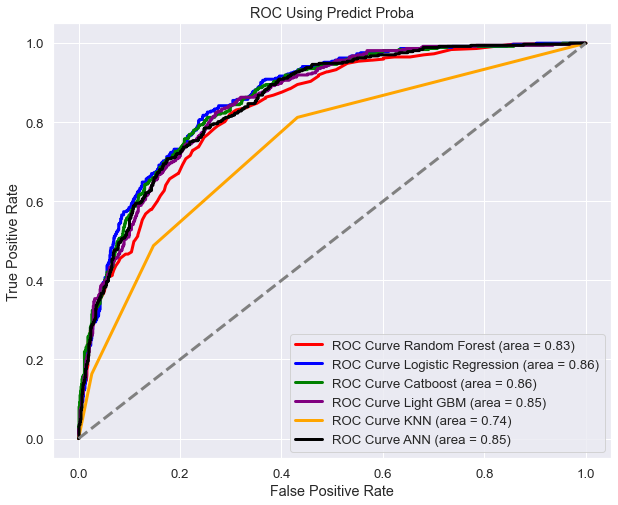

In [70]:
from sklearn.metrics import roc_curve, auc

# Memplot kurva ROC-AUC
plt.figure(figsize=(10, 8))  # Mengatur ukuran gambar menjadi 10x8
plt.plot(fpr_rfc, tpr_rfc, color='red', lw=3, label='ROC Curve Random Forest (area = %0.2f)' % roc_auc_rfc)
plt.plot(fpr_lrc, tpr_lrc, color='blue', lw=3, label='ROC Curve Logistic Regression (area = %0.2f)' % roc_auc_lrc)
plt.plot(fpr_cbc, tpr_cbc, color='green', lw=3, label='ROC Curve Catboost (area = %0.2f)' % roc_auc_cbc)
plt.plot(fpr_lgbm, tpr_lgbm, color='purple', lw=3, label='ROC Curve Light GBM (area = %0.2f)' % roc_auc_lgbm)
plt.plot(fpr_knn, tpr_knn, color='orange', lw=3, label='ROC Curve KNN (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_ann, tpr_ann, color='black', lw=3, label='ROC Curve ANN (area = %0.2f)' % roc_auc_ann)

plt.plot([0, 1], [0, 1], color='gray', lw=3, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Using Predict Proba')
plt.legend(loc="lower right")
plt.show()

## Hyperparameter Tuning

### ANN

In [137]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

# Function to create ANN model
def create_ann_model(optimizer='adam', neurons_layer1=64, neurons_layer2=32):
    ann_model = Sequential([
        Dense(neurons_layer1, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(neurons_layer2, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    ann_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return ann_model

# Define hyperparameters grid
param_grid = {
    'neurons_layer1': [32, 64, 128],
    'neurons_layer2': [16, 32, 64],
    'optimizer': ['adam', 'rmsprop']
}

# Perform GridSearchCV manually iterating through the parameter grid
best_score = 0
best_params = {}

for neurons_layer1 in param_grid['neurons_layer1']:
    for neurons_layer2 in param_grid['neurons_layer2']:
        for optimizer in param_grid['optimizer']:
            ann_model = KerasClassifier(build_fn=create_ann_model, neurons_layer1=neurons_layer1,
                                        neurons_layer2=neurons_layer2, optimizer=optimizer, verbose=0)
            ann_model.fit(X_train, y_train)
            score = ann_model.score(X_train, y_train)
            if score > best_score:
                best_score = score
                best_params = {'neurons_layer1': neurons_layer1, 'neurons_layer2': neurons_layer2, 'optimizer': optimizer}

# Print results
print("Best Score:", best_score)
print("Best Parameters:", best_params)

Best Score: 0.7974795882144124
Best Parameters: {'neurons_layer1': 128, 'neurons_layer2': 64, 'optimizer': 'rmsprop'}


In [138]:
# Initialize lists to store evaluation metrics
accuracy_scores = []
f1_scores = []
roc_auc_scores = []
balanced_accuracy_scores = []

# Define ANN model
ann_best = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
ann_best.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
ann_best.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32)

y_prob_fold = ann_best.predict(X_val_fold)
y_pred_fold = (y_prob_fold > 0.5).astype(int)

accuracy_scores.append(accuracy_score(y_val_fold, y_pred_fold))
f1_scores.append(f1_score(y_val_fold, y_pred_fold))
roc_auc_scores.append(roc_auc_score(y_val_fold, y_pred_fold))
balanced_accuracy_scores.append(balanced_accuracy_score(y_val_fold, y_pred_fold))

Epoch 1/10
159/159 [==============================] - 3s 5ms/step - loss: 0.4637 - accuracy: 0.7732
Epoch 2/10
159/159 [==============================] - 1s 4ms/step - loss: 0.4385 - accuracy: 0.7892
Epoch 3/10
159/159 [==============================] - 1s 4ms/step - loss: 0.4349 - accuracy: 0.7900
Epoch 4/10
159/159 [==============================] - 1s 5ms/step - loss: 0.4293 - accuracy: 0.7949
Epoch 5/10
159/159 [==============================] - 1s 4ms/step - loss: 0.4242 - accuracy: 0.7959
Epoch 6/10
159/159 [==============================] - 1s 4ms/step - loss: 0.4218 - accuracy: 0.7979
Epoch 7/10
159/159 [==============================] - 1s 4ms/step - loss: 0.4186 - accuracy: 0.8020
Epoch 8/10
159/159 [==============================] - 1s 5ms/step - loss: 0.4153 - accuracy: 0.8048
Epoch 9/10
159/159 [==============================] - 1s 3ms/step - loss: 0.4124 - accuracy: 0.8060
Epoch 10/10
18/18 [==============================] - 0s 3ms/step


In [142]:
# Mean metrics pada data validasi
avg_accuracy_ann_val_best = round(np.mean(accuracy_scores), 3)
avg_f1_ann_val_best = round(np.mean(f1_scores), 3)
avg_roc_auc_ann_val_best = round(np.mean(roc_auc_scores), 3)
avg_balanced_accuracy_ann_val_best = round(np.mean(balanced_accuracy_scores), 3)

ann_best.fit(X_train, y_train)
y_prob_test = ann_best.predict(X_test)
y_pred_test = (y_prob_test > 0.5).astype(int)

# Metrics pada data test
accuracy_ann_test_best = accuracy_score(y_test, y_pred_test)
f1_ann_test_best = f1_score(y_test, y_pred_test)
roc_auc_ann_test_best = roc_auc_score(y_test, y_pred_test)
balanced_accuracy_ann_test_best = balanced_accuracy_score(y_test, y_pred_test)

print("Evaluation Metrics:")
print(f"(Accuracy)          --> Avg. Validation: {avg_accuracy_ann_val_best}\t| Test: {accuracy_ann_test_best}")
print(f"(F1 Score)          --> Avg. Validation: {avg_f1_ann_val_best}\t| Test: {f1_ann_test_best}")
print(f"(ROC-AUC Score)     --> Avg. Validation: {avg_roc_auc_ann_val_best}\t| Test: {roc_auc_ann_test_best}")
print(f"(Balanced Accuracy) --> Avg. Validation: {avg_balanced_accuracy_ann_val_best}\t| Test: {balanced_accuracy_ann_test_best}")

45/45 [==============================] - 0s 4ms/step
Evaluation Metrics:
(Accuracy)          --> Avg. Validation: 0.817	| Test: 0.8062455642299503
(F1 Score)          --> Avg. Validation: 0.596	| Test: 0.5687203791469193
(ROC-AUC Score)     --> Avg. Validation: 0.726	| Test: 0.7026768246607389
(Balanced Accuracy) --> Avg. Validation: 0.726	| Test: 0.7026768246607389


### Catboost

In [72]:
from sklearn.model_selection import GridSearchCV

cbc = CatBoostClassifier(random_state=42, verbose=False)

cbc_param_grid = {
    'iterations': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 64, 128]
}

cbc_grid_search = GridSearchCV(cbc, cbc_param_grid, cv=10, scoring='balanced_accuracy', verbose=1)
cbc_grid_search.fit(X_train, y_train)
print("Best parameters for CatBoost:", cbc_grid_search.best_params_)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


Best parameters for CatBoost: {'border_count': 64, 'depth': 4, 'iterations': 50, 'l2_leaf_reg': 1, 'learning_rate': 0.2}


In [73]:
best_cbc = cbc_grid_search.best_estimator_

accuracy_scores = []
f1_scores = []
roc_auc_scores = []
balanced_accuracy_scores = []

best_cbc.fit(X_train_fold, y_train_fold)

y_pred_fold = best_cbc.predict(X_val_fold)

accuracy_scores.append(accuracy_score(y_val_fold, y_pred_fold))
f1_scores.append(f1_score(y_val_fold, y_pred_fold))
roc_auc_scores.append(roc_auc_score(y_val_fold, y_pred_fold))
balanced_accuracy_scores.append(balanced_accuracy_score(y_val_fold, y_pred_fold))

In [74]:
# Mean metrics pada data validasi
avg_accuracy_cbc_val_best = round(np.mean(accuracy_scores), 3)
avg_f1_cbc_val_best = round(np.mean(f1_scores), 3)
avg_roc_auc_cbc_val_best = round(np.mean(roc_auc_scores), 3)
avg_balanced_accuracy_cbc_val_best = round(np.mean(balanced_accuracy_scores), 3)

best_cbc.fit(X_train, y_train)
y_pred_test = best_cbc.predict(X_test)

# Metrics pada data test
accuracy_cbc_test_best = accuracy_score(y_test, y_pred_test)
f1_cbc_test_best = f1_score(y_test, y_pred_test)
roc_auc_cbc_test_best = roc_auc_score(y_test, y_pred_test)
balanced_accuracy_cbc_test_best = balanced_accuracy_score(y_test, y_pred_test)

print("Evaluation Metrics:")
print(f"(Accuracy)          --> Avg. Validation: {avg_accuracy_cbc_val_best}\t| Test: {accuracy_cbc_test_best}")
print(f"(F1 Score)          --> Avg. Validation: {avg_f1_cbc_val_best}\t| Test: {f1_cbc_test_best}")
print(f"(ROC-AUC Score)     --> Avg. Validation: {avg_roc_auc_cbc_val_best}\t| Test: {roc_auc_cbc_test_best}")
print(f"(Balanced Accuracy) --> Avg. Validation: {avg_balanced_accuracy_cbc_val_best}\t| Test: {balanced_accuracy_cbc_test_best}")

Evaluation Metrics:
(Accuracy)          --> Avg. Validation: 0.819	| Test: 0.8105039034776437
(F1 Score)          --> Avg. Validation: 0.595	| Test: 0.602086438152012
(ROC-AUC Score)     --> Avg. Validation: 0.725	| Test: 0.724445433560715
(Balanced Accuracy) --> Avg. Validation: 0.725	| Test: 0.7240702019522395


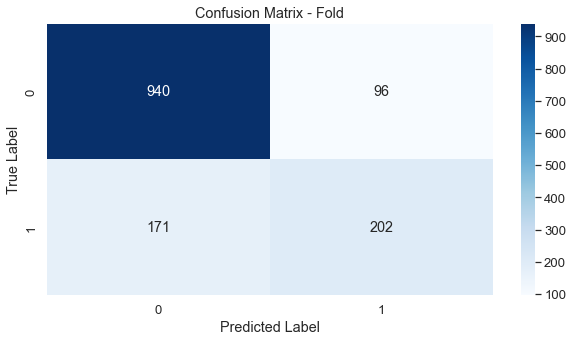

In [75]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Fold')
plt.show()

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



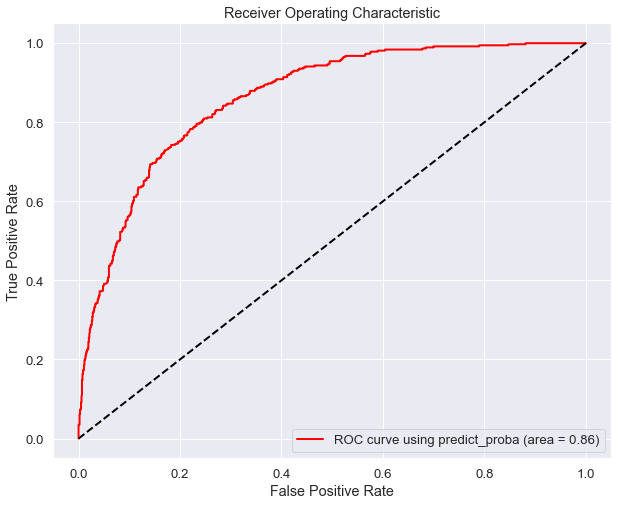

In [77]:
from sklearn.metrics import roc_curve, auc

# Menghitung TPR dan FPR untuk kedua metode
fpr_cbc_best, tpr_cbc_best, _ = roc_curve(y_test, best_cbc.predict_proba(X_test)[:, 1])
roc_auc_cbc_best = auc(fpr_cbc_best, tpr_cbc_best)

# Memplot kurva ROC-AUC
plt.figure(figsize=(10, 8))
plt.plot(fpr_cbc_best, tpr_cbc_best, color='red', lw=2, label='ROC curve using predict_proba (area = %0.2f)' % roc_auc_cbc_best)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression

In [78]:
lrc = LogisticRegression()

lrc_param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

lrc_grid_search = GridSearchCV(lrc, lrc_param_grid, cv=10, scoring='balanced_accuracy', verbose=1)
lrc_grid_search.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", lrc_grid_search.best_params_)

Fitting 10 folds for each of 80 candidates, totalling 800 fits
Best parameters for Logistic Regression: {'C': 0.01, 'penalty': 'none', 'solver': 'newton-cg'}


In [79]:
best_lrc = lrc_grid_search.best_estimator_

accuracy_scores = []
f1_scores = []
roc_auc_scores = []
balanced_accuracy_scores = []

best_lrc.fit(X_train_fold, y_train_fold)

y_pred_fold = best_lrc.predict(X_val_fold)

accuracy_scores.append(accuracy_score(y_val_fold, y_pred_fold))
f1_scores.append(f1_score(y_val_fold, y_pred_fold))
roc_auc_scores.append(roc_auc_score(y_val_fold, y_pred_fold))
balanced_accuracy_scores.append(balanced_accuracy_score(y_val_fold, y_pred_fold))

In [80]:
# Mean metrics pada data validasi
avg_accuracy_lrc_val_best = round(np.mean(accuracy_scores), 3)
avg_f1_lrc_val_best = round(np.mean(f1_scores), 3)
avg_roc_auc_lrc_val_best = round(np.mean(roc_auc_scores), 3)
avg_balanced_accuracy_lrc_val_best = round(np.mean(balanced_accuracy_scores), 3)

best_lrc.fit(X_train, y_train)
y_pred_test = best_lrc.predict(X_test)

# Metrics pada data test
accuracy_lrc_test_best = accuracy_score(y_test, y_pred_test)
f1_lrc_test_best = f1_score(y_test, y_pred_test)
roc_auc_lrc_test_best = roc_auc_score(y_test, y_pred_test)
balanced_accuracy_lrc_test_best = balanced_accuracy_score(y_test, y_pred_test)

print("Evaluation Metrics:")
print(f"(Accuracy)          --> Avg. Validation: {avg_accuracy_lrc_val_best}\t| Test: {accuracy_lrc_test_best}")
print(f"(F1 Score)          --> Avg. Validation: {avg_f1_lrc_val_best}\t| Test: {f1_lrc_test_best}")
print(f"(ROC-AUC Score)     --> Avg. Validation: {avg_roc_auc_lrc_val_best}\t| Test: {roc_auc_lrc_test_best}")
print(f"(Balanced Accuracy) --> Avg. Validation: {avg_balanced_accuracy_lrc_val_best}\t| Test: {balanced_accuracy_lrc_test_best}")

Evaluation Metrics:
(Accuracy)          --> Avg. Validation: 0.817	| Test: 0.8161816891412349
(F1 Score)          --> Avg. Validation: 0.628	| Test: 0.6262626262626263
(ROC-AUC Score)     --> Avg. Validation: 0.753	| Test: 0.741174293788235
(Balanced Accuracy) --> Avg. Validation: 0.753	| Test: 0.74


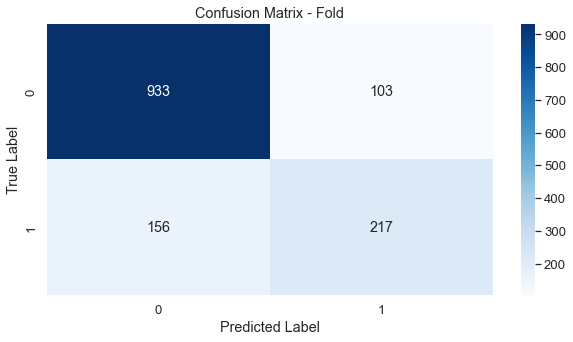

In [81]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Fold')
plt.show()

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



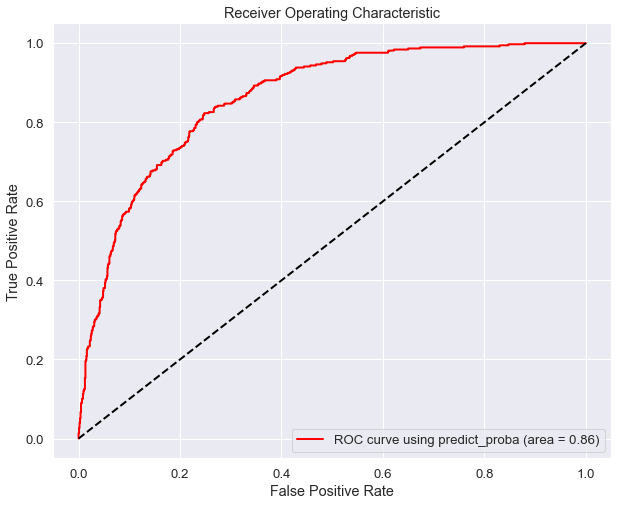

In [83]:
from sklearn.metrics import roc_curve, auc

# Menghitung TPR dan FPR untuk kedua metode
fpr_lrc_best, tpr_lrc_best, _ = roc_curve(y_test, best_lrc.predict_proba(X_test)[:, 1])
roc_auc_lrc_best = auc(fpr_lrc_best, tpr_lrc_best)

# Memplot kurva ROC-AUC
plt.figure(figsize=(10, 8))  
plt.plot(fpr_lrc_best, tpr_lrc_best, color='red', lw=2, label='ROC curve using predict_proba (area = %0.2f)' % roc_auc_lrc_best)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### KNN

In [84]:
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=10, scoring='balanced_accuracy', verbose=1)
knn_grid_search.fit(X_train, y_train)

print("Best parameters for KNN:", knn_grid_search.best_params_)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
Best parameters for KNN: {'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}


In [85]:
best_knn = knn_grid_search.best_estimator_

accuracy_scores = []
f1_scores = []
roc_auc_scores = []
balanced_accuracy_scores = []

best_knn.fit(X_train_fold, y_train_fold)

y_pred_fold = best_knn.predict(X_val_fold)

accuracy_scores.append(accuracy_score(y_val_fold, y_pred_fold))
f1_scores.append(f1_score(y_val_fold, y_pred_fold))
roc_auc_scores.append(roc_auc_score(y_val_fold, y_pred_fold))
balanced_accuracy_scores.append(balanced_accuracy_score(y_val_fold, y_pred_fold))

In [86]:
# Mean metrics pada data validasi
avg_accuracy_knn_val_best = round(np.mean(accuracy_scores), 3)
avg_f1_knn_val_best = round(np.mean(f1_scores), 3)
avg_roc_auc_knn_val_best = round(np.mean(roc_auc_scores), 3)
avg_balanced_accuracy_knn_val_best = round(np.mean(balanced_accuracy_scores), 3)

best_knn.fit(X_train, y_train)
y_pred_test = best_knn.predict(X_test)

# Metrics pada data test
accuracy_knn_test_best = accuracy_score(y_test, y_pred_test)
f1_knn_test_best = f1_score(y_test, y_pred_test)
roc_auc_knn_test_best = roc_auc_score(y_test, y_pred_test)
balanced_accuracy_knn_test_best = balanced_accuracy_score(y_test, y_pred_test)

print("Evaluation Metrics:")
print(f"(Accuracy)          --> Avg. Validation: {avg_accuracy_knn_val_best}\t| Test: {accuracy_knn_test_best}")
print(f"(F1 Score)          --> Avg. Validation: {avg_f1_knn_val_best}\t| Test: {f1_knn_test_best}")
print(f"(ROC-AUC Score)     --> Avg. Validation: {avg_roc_auc_knn_val_best}\t| Test: {roc_auc_knn_test_best}")
print(f"(Balanced Accuracy) --> Avg. Validation: {avg_balanced_accuracy_knn_val_best}\t| Test: {balanced_accuracy_knn_test_best}")

Evaluation Metrics:
(Accuracy)          --> Avg. Validation: 0.792	| Test: 0.7892122072391767
(F1 Score)          --> Avg. Validation: 0.581	| Test: 0.5892116182572614
(ROC-AUC Score)     --> Avg. Validation: 0.722	| Test: 0.7194030970840622
(Balanced Accuracy) --> Avg. Validation: 0.722	| Test: 0.6701261295765317


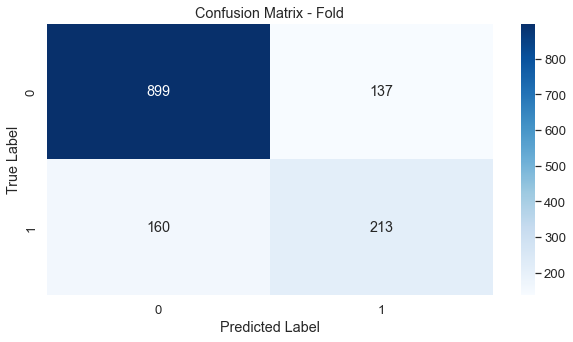

In [87]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Fold')
plt.show()

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1036
           1       0.61      0.57      0.59       373

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.79      0.79      0.79      1409



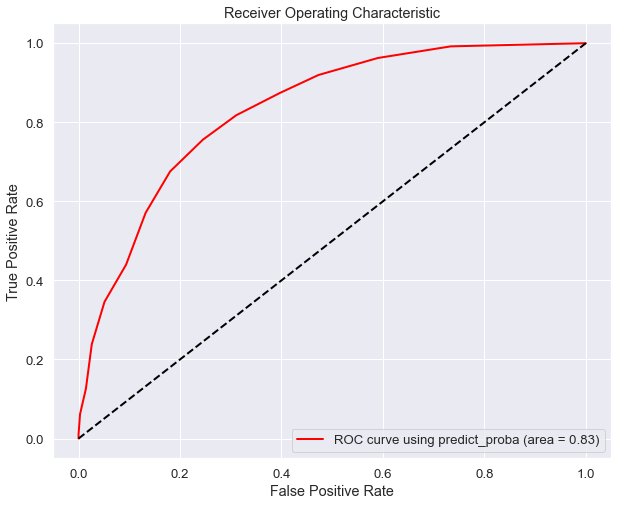

In [89]:
from sklearn.metrics import roc_curve, auc

# Menghitung TPR dan FPR untuk kedua metode
fpr_knn_best, tpr_knn_best, _ = roc_curve(y_test, best_knn.predict_proba(X_test)[:, 1])
roc_auc_knn_best = auc(fpr_knn_best, tpr_knn_best)

# Memplot kurva ROC-AUC
plt.figure(figsize=(10, 8))  # Mengatur ukuran gambar menjadi 10x8
plt.plot(fpr_knn_best, tpr_knn_best, color='red', lw=2, label='ROC curve using predict_proba (area = %0.2f)' % roc_auc_knn_best)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Light GBM

In [90]:
lgbm = LGBMClassifier(random_state=42, verbose=0)

lgbm_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'num_leaves': [20, 30, 40]
}

lgbm_grid_search = GridSearchCV(lgbm, lgbm_param_grid, cv=10, scoring='balanced_accuracy', verbose=1)
lgbm_grid_search.fit(X_train, y_train)

print("Best parameters for LightGBM:", lgbm_grid_search.best_params_)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

In [91]:
best_lgbm = lgbm_grid_search.best_estimator_

accuracy_scores = []
f1_scores = []
roc_auc_scores = []
balanced_accuracy_scores = []

best_lgbm.fit(X_train_fold, y_train_fold)

y_pred_fold = best_lgbm.predict(X_val_fold)

accuracy_scores.append(accuracy_score(y_val_fold, y_pred_fold))
f1_scores.append(f1_score(y_val_fold, y_pred_fold))
roc_auc_scores.append(roc_auc_score(y_val_fold, y_pred_fold))
balanced_accuracy_scores.append(balanced_accuracy_score(y_val_fold, y_pred_fold))

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [92]:
# Mean metrics pada data validasi
avg_accuracy_lgbm_val_best = round(np.mean(accuracy_scores), 3)
avg_f1_lgbm_val_best = round(np.mean(f1_scores), 3)
avg_roc_auc_lgbm_val_best = round(np.mean(roc_auc_scores), 3)
avg_balanced_accuracy_lgbm_val_best = round(np.mean(balanced_accuracy_scores), 3)

best_lgbm.fit(X_train, y_train)
y_pred_test = best_lgbm.predict(X_test)

# Metrics pada data test
accuracy_lgbm_test_best = accuracy_score(y_test, y_pred_test)
f1_lgbm_test_best = f1_score(y_test, y_pred_test)
roc_auc_lgbm_test_best = roc_auc_score(y_test, y_pred_test)
balanced_accuracy_lgbm_test_best = balanced_accuracy_score(y_test, y_pred_test)

print("Evaluation Metrics:")
print(f"(Accuracy)          --> Avg. Validation: {avg_accuracy_lgbm_val_best}\t| Test: {accuracy_lgbm_test_best}")
print(f"(F1 Score)          --> Avg. Validation: {avg_f1_lgbm_val_best}\t| Test: {f1_lgbm_test_best}")
print(f"(ROC-AUC Score)     --> Avg. Validation: {avg_roc_auc_lgbm_val_best}\t| Test: {roc_auc_lgbm_test_best}")
print(f"(Balanced Accuracy) --> Avg. Validation: {avg_balanced_accuracy_lgbm_val_best}\t| Test: {balanced_accuracy_lgbm_test_best}")

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Evaluation Metrics:
(Accuracy)          --> Avg. Validation: 0.826	| Test: 0.8097941802696949
(F1 Sc

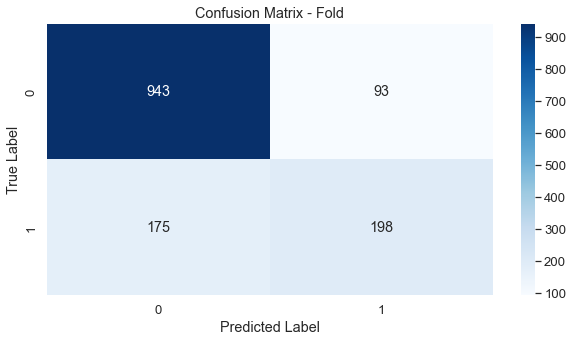

In [93]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Fold')
plt.show()

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1036
           1       0.68      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



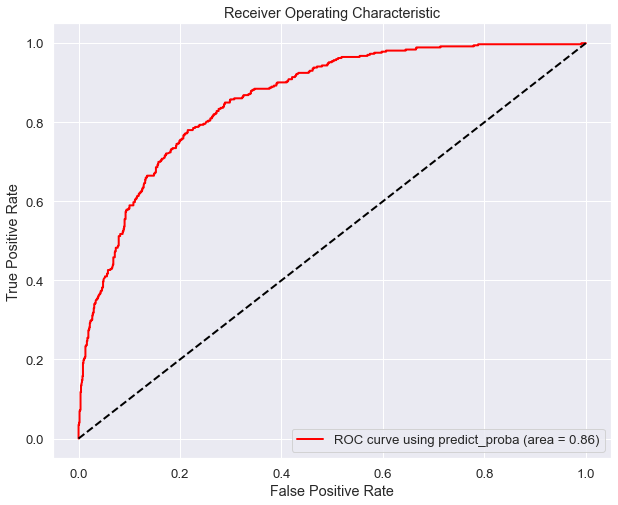

In [106]:
from sklearn.metrics import roc_curve, auc

# Menghitung TPR dan FPR untuk kedua metode
fpr_lgbm_best, tpr_lgbm_best, _ = roc_curve(y_test, best_lgbm.predict_proba(X_test)[:, 1])
roc_auc_lgbm_best = auc(fpr_lgbm_best, tpr_lgbm_best)

# Memplot kurva ROC-AUC
plt.figure(figsize=(10, 8)) 
plt.plot(fpr_lgbm_best, tpr_lgbm_best, color='red', lw=2, label='ROC curve using predict_proba (area = %0.2f)' % roc_auc_lgbm_best)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Random Forest

In [96]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rfc_grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='balanced_accuracy', verbose=1)
rfc_grid_search.fit(X_train, y_train)

print("Best parameters for Random Forest Classifier:", rfc_grid_search.best_params_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters for Random Forest Classifier: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


In [97]:
best_rfc = rfc_grid_search.best_estimator_

accuracy_scores = []
f1_scores = []
roc_auc_scores = []
balanced_accuracy_scores = []

best_rfc.fit(X_train_fold, y_train_fold)

y_pred_fold = best_rfc.predict(X_val_fold)

accuracy_scores.append(accuracy_score(y_val_fold, y_pred_fold))
f1_scores.append(f1_score(y_val_fold, y_pred_fold))
roc_auc_scores.append(roc_auc_score(y_val_fold, y_pred_fold))
balanced_accuracy_scores.append(balanced_accuracy_score(y_val_fold, y_pred_fold))

In [98]:
# Mean metrics pada data validasi
avg_accuracy_rfc_val_best = round(np.mean(accuracy_scores), 3)
avg_f1_rfc_val_best = round(np.mean(f1_scores), 3)
avg_roc_auc_rfc_val_best = round(np.mean(roc_auc_scores), 3)
avg_balanced_accuracy_rfc_val_best = round(np.mean(balanced_accuracy_scores), 3)

best_rfc.fit(X_train, y_train)
y_pred_test = best_rfc.predict(X_test)

# Metrics pada data test
accuracy_rfc_test_best = accuracy_score(y_test, y_pred_test)
f1_rfc_test_best = f1_score(y_test, y_pred_test)
roc_auc_rfc_test_best = roc_auc_score(y_test, y_pred_test)
balanced_accuracy_rfc_test_best = balanced_accuracy_score(y_test, y_pred_test)

print("Evaluation Metrics:")
print(f"(Accuracy)          --> Avg. Validation: {avg_accuracy_rfc_val_best}\t| Test: {accuracy_rfc_test_best}")
print(f"(F1 Score)          --> Avg. Validation: {avg_f1_rfc_val_best}\t| Test: {f1_rfc_test_best}")
print(f"(ROC-AUC Score)     --> Avg. Validation: {avg_roc_auc_rfc_val_best}\t| Test: {roc_auc_rfc_test_best}")
print(f"(Balanced Accuracy) --> Avg. Validation: {avg_balanced_accuracy_rfc_val_best}\t| Test: {balanced_accuracy_rfc_test_best}")

Evaluation Metrics:
(Accuracy)          --> Avg. Validation: 0.808	| Test: 0.8069552874378992
(F1 Score)          --> Avg. Validation: 0.561	| Test: 0.5853658536585367
(ROC-AUC Score)     --> Avg. Validation: 0.703	| Test: 0.713453735236577
(Balanced Accuracy) --> Avg. Validation: 0.703	| Test: 0.687


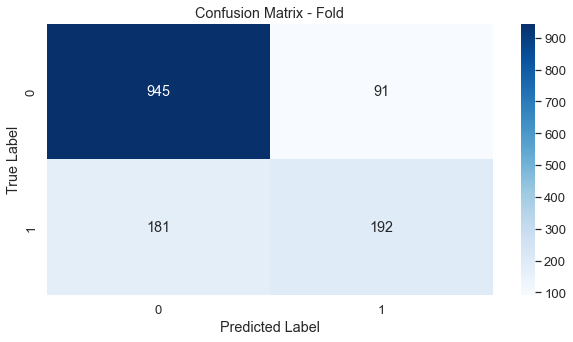

In [99]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Fold')
plt.show()

In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.68      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



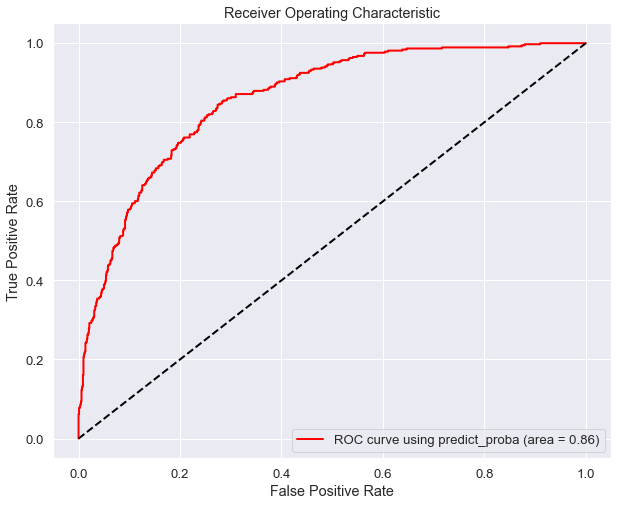

In [101]:
from sklearn.metrics import roc_curve, auc

# Menghitung TPR dan FPR untuk kedua metode
fpr_best_rfc, tpr_best_rfc, _ = roc_curve(y_test, best_rfc.predict_proba(X_test)[:, 1])
roc_auc_best_rfc = auc(fpr_best_rfc, tpr_best_rfc)

# Memplot kurva ROC-AUC
plt.figure(figsize=(10, 8)) 
plt.plot(fpr_best_rfc, tpr_best_rfc, color='red', lw=2, label='ROC curve using predict_proba (area = %0.2f)' % roc_auc_best_rfc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Evaluation - Hyperparameter Tuning

In [109]:
df_metric.sort_values(by=['(Val.) Balanced Accuracy', '(Test) Balanced Accuracy'], ascending=False).reset_index(drop=True)

,Model Name,(Val.) Balanced Accuracy,(Test) Balanced Accuracy,(Val.) F-1 Score,(Test) F-1 Score,(Val.) ROC-AUC Score,(Test) ROC-AUC Score,(Val.) Accuracy Score,(Test) Accuracy Score
0,ANN,0.749,0.726000,0.633,0.603000,0.749,0.726000,0.833,0.808000
1,Logistic Regression,0.746,0.740000,0.620,0.625000,0.746,0.740000,0.817,0.816000
2,Catboost,0.739,0.724070,0.617,0.601796,0.739,0.724070,0.826,0.811214
3,Light GBM,0.731,0.714632,0.602,0.585294,0.731,0.714632,0.817,0.799858
4,Random Forest,0.706,0.687000,0.566,0.541000,0.706,0.687000,0.812,0.791000
5,KNN,0.648,0.670126,0.468,0.514124,0.648,0.670126,0.746,0.755855


In [111]:
df_metric_best = pd.DataFrame({
    'Model Name':['Random Forest', 'Logistic Regression', 'KNN', 'Catboost', 'Light GBM', 'ANN'],
    '(Val.) Balanced Accuracy':[avg_balanced_accuracy_rfc_val_best, avg_balanced_accuracy_lrc_val_best, avg_balanced_accuracy_knn_val_best, avg_balanced_accuracy_cbc_val_best, avg_balanced_accuracy_lgbm_val_best, avg_balanced_accuracy_ann_val],
    '(Test) Balanced Accuracy':[balanced_accuracy_rfc_test_best, balanced_accuracy_lrc_test_best, balanced_accuracy_knn_test_best, balanced_accuracy_cbc_test_best, balanced_accuracy_lgbm_test_best, balanced_accuracy_ann_test],
    '(Val.) F-1 Score':[avg_f1_rfc_val_best, avg_f1_lrc_val_best, avg_f1_knn_val_best, avg_f1_cbc_val_best, avg_f1_lgbm_val_best, avg_f1_ann_val],
    '(Test) F-1 Score':[f1_rfc_test_best, f1_lrc_test_best, f1_knn_test_best, f1_cbc_test_best, f1_lgbm_test_best, f1_ann_test],
    '(Val.) ROC-AUC Score':[avg_roc_auc_rfc_val_best, avg_roc_auc_lrc_val_best, avg_roc_auc_knn_val_best, avg_roc_auc_cbc_val_best, avg_roc_auc_lgbm_val_best, avg_roc_auc_ann_val],
    '(Test) ROC-AUC Score':[roc_auc_rfc_test_best, roc_auc_lrc_test_best, roc_auc_knn_test_best, roc_auc_cbc_test_best, roc_auc_lgbm_test_best, roc_auc_ann_test],
    '(Val.) Accuracy Score':[avg_accuracy_rfc_val_best, avg_accuracy_lrc_val_best, avg_accuracy_knn_val_best, avg_accuracy_cbc_val_best, avg_accuracy_lgbm_val_best, avg_accuracy_ann_val],
    '(Test) Accuracy Score':[accuracy_rfc_test_best, accuracy_lrc_test_best, accuracy_knn_test_best, accuracy_cbc_test_best, accuracy_lgbm_test_best, accuracy_ann_test],
})

df_metric_best.sort_values(by=['(Val.) Balanced Accuracy', '(Test) Balanced Accuracy'], ascending=False).reset_index(drop=True)

,Model Name,(Val.) Balanced Accuracy,(Test) Balanced Accuracy,(Val.) F-1 Score,(Test) F-1 Score,(Val.) ROC-AUC Score,(Test) ROC-AUC Score,(Val.) Accuracy Score,(Test) Accuracy Score
0,Logistic Regression,0.753,0.741174,0.628,0.626263,0.753,0.741174,0.817,0.816182
1,ANN,0.749,0.726000,0.633,0.603000,0.749,0.726000,0.833,0.808000
2,Light GBM,0.735,0.720531,0.611,0.596386,0.735,0.720531,0.826,0.809794
3,Catboost,0.725,0.724445,0.595,0.602086,0.725,0.724445,0.819,0.810504
4,KNN,0.722,0.719403,0.581,0.589212,0.722,0.719403,0.792,0.789212
5,Random Forest,0.703,0.713454,0.561,0.585366,0.703,0.713454,0.808,0.806955


In [104]:
df_compare_metrics = pd.DataFrame({
    'Model Name':['Random Forest', 'Logistic Regression', 'KNN', 'Catboost', 'Light GBM'],
    '(Val.) Balanced Accuracy':[
        avg_balanced_accuracy_rfc_val_best - avg_balanced_accuracy_rfc_val, 
        avg_balanced_accuracy_lrc_val_best - avg_balanced_accuracy_lrc_val, 
        avg_balanced_accuracy_knn_val_best - avg_balanced_accuracy_knn_val , 
        avg_balanced_accuracy_cbc_val_best - avg_balanced_accuracy_cbc_val,
        avg_balanced_accuracy_lgbm_val_best - avg_balanced_accuracy_lgbm_val
    ],
    '(Test) Balanced Accuracy':[
        balanced_accuracy_rfc_test_best - balanced_accuracy_rfc_test, 
        balanced_accuracy_lrc_test_best - balanced_accuracy_lrc_test,
        balanced_accuracy_knn_test_best - balanced_accuracy_knn_test,
        balanced_accuracy_cbc_test_best - balanced_accuracy_cbc_test,
        balanced_accuracy_lgbm_test_best - balanced_accuracy_lgbm_test
    ],
    
    '(Val.) F-1 Score':[
        avg_f1_rfc_val_best - avg_f1_rfc_val, 
        avg_f1_lrc_val_best - avg_f1_lrc_val, 
        avg_f1_knn_val_best - avg_f1_knn_val, 
        avg_f1_cbc_val_best - avg_f1_cbc_val,
        avg_f1_lgbm_val_best - avg_f1_lgbm_val
    ],
    '(Test) F-1 Score':[
        f1_rfc_test_best - f1_rfc_test, 
        f1_lrc_test_best - f1_lrc_test,
        f1_knn_test_best - f1_knn_test,
        f1_cbc_test_best - f1_cbc_test,
        f1_lgbm_test_best - f1_lgbm_test
    ],
    
    '(Val.) ROC-AUC Score':[
        avg_roc_auc_rfc_val_best - avg_roc_auc_rfc_val,
        avg_roc_auc_lrc_val_best - avg_roc_auc_lrc_val,
        avg_roc_auc_knn_val_best - avg_roc_auc_knn_val,
        avg_roc_auc_cbc_val_best - avg_roc_auc_cbc_val,
        avg_roc_auc_lgbm_val_best - avg_roc_auc_lgbm_val
    ],
    
    '(Test) ROC-AUC Score':[
        roc_auc_rfc_test_best - roc_auc_rfc_test, 
        roc_auc_lrc_test_best - roc_auc_lrc_test,
        roc_auc_knn_test_best - roc_auc_knn_test,
        roc_auc_cbc_test_best - roc_auc_cbc_test,
        roc_auc_lgbm_test_best - roc_auc_lgbm_test_best
    ],
    
    '(Val.) Accuracy Score':[
        avg_accuracy_rfc_val_best - avg_accuracy_rfc_val,
        avg_accuracy_lrc_val_best - avg_accuracy_lrc_val,
        avg_accuracy_knn_val_best - avg_accuracy_knn_val,
        avg_accuracy_cbc_val_best - avg_accuracy_cbc_val,
        avg_accuracy_lgbm_val_best - avg_accuracy_lgbm_val
    ],
    '(Test) Accuracy Score':[
        accuracy_rfc_test_best - accuracy_rfc_test, 
        accuracy_lrc_test_best - accuracy_lrc_test,
        accuracy_knn_test_best - accuracy_knn_test,
        accuracy_cbc_test_best - accuracy_cbc_test,
        accuracy_lgbm_test_best - accuracy_lgbm_test
    ],
})

df_compare_metrics.sort_values(by=['(Val.) Balanced Accuracy', '(Test) Balanced Accuracy'], ascending=False).reset_index(drop=True)

,Model Name,(Val.) Balanced Accuracy,(Test) Balanced Accuracy,(Val.) F-1 Score,(Test) F-1 Score,(Val.) ROC-AUC Score,(Test) ROC-AUC Score,(Val.) Accuracy Score,(Test) Accuracy Score
0,KNN,0.074,0.049277,0.113,0.075087,0.074,0.049277,0.046,0.033357
1,Logistic Regression,0.007,0.001174,0.008,0.001263,0.007,0.001174,0.000,0.000182
2,Light GBM,0.004,0.005899,0.009,0.011091,0.004,0.000000,0.009,0.009936
3,Random Forest,-0.003,0.026454,-0.005,0.044366,-0.003,0.026454,-0.004,0.015955
4,Catboost,-0.014,0.000375,-0.022,0.000290,-0.014,0.000375,-0.007,-0.000710


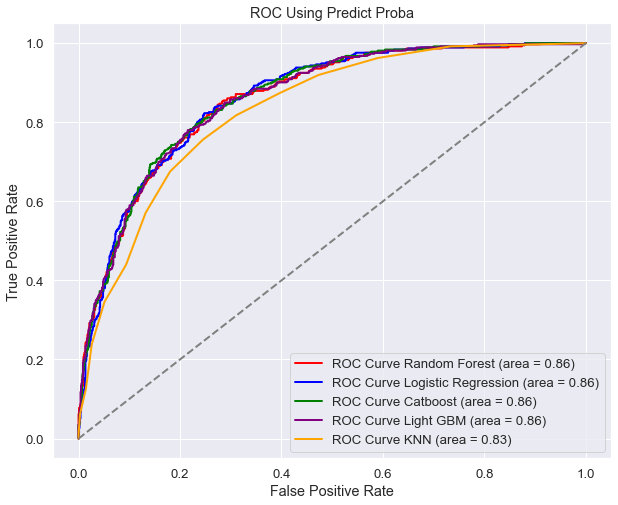

In [108]:
# Memplot kurva ROC-AUC
plt.figure(figsize=(10, 8))
plt.plot(fpr_best_rfc, tpr_best_rfc, color='red', lw=2, label='ROC Curve Random Forest (area = %0.2f)' % roc_auc_best_rfc)
plt.plot(fpr_lrc_best, tpr_lrc_best, color='blue', lw=2, label='ROC Curve Logistic Regression (area = %0.2f)' % roc_auc_lrc_best)
plt.plot(fpr_cbc_best, tpr_cbc_best, color='green', lw=2, label='ROC Curve Catboost (area = %0.2f)' % roc_auc_cbc_best)
plt.plot(fpr_lgbm_best, tpr_lgbm_best, color='purple', lw=2, label='ROC Curve Light GBM (area = %0.2f)' % roc_auc_lgbm_best)
plt.plot(fpr_knn_best, tpr_knn_best, color='orange', lw=2, label='ROC Curve KNN (area = %0.2f)' % roc_auc_knn_best)
# plt.plot(fpr_best_ann, tpr_best_ann, color='black', lw=2, label='ROC Curve ANN (area = %0.2f)' % roc_auc_best_ann)

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Using Predict Proba')
plt.legend(loc="lower right")
plt.show()